In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [3]:
categorie = 'Renda.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V124,V125,V126,V127,V128,V129,V130,V131,V132,Unnamed: 134
0,4.300034e+12,4300034,ACEGUÁ,1,2600914,2600394,520,35,94,287,...,79234,77180,78460,21000,20200,14000,1757,861,660287,0.0
1,4.300059e+12,4300059,ÁGUA SANTA,3,3140723,3139854,869,10,49,136,...,102250,136220,82810,33911,38700,225500,1573,1003,1093917,0.0
2,4.300109e+12,4300109,AGUDO,6,11800547,11790423,10124,67,200,603,...,661051,739895,532076,122625,56700,177065,7378,5493,4854300,0.0
3,4.300208e+12,4300208,AJURICABA,11,5871321,5858663,12658,16,89,276,...,211595,202299,134850,24870,28000,25700,3262,2047,1587491,0.0
4,4.300307e+12,4300307,ALECRIM,3,3297509,3294831,2678,129,181,394,...,135153,127433,89485,19600,8000,54510,3171,2211,1449521,0.0


In [4]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
to_drop = columns[constant_columns].tolist()
data.drop(to_drop, axis=1, inplace = True)
to_drop

['Unnamed: 16', 'Unnamed: 134']

In [5]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

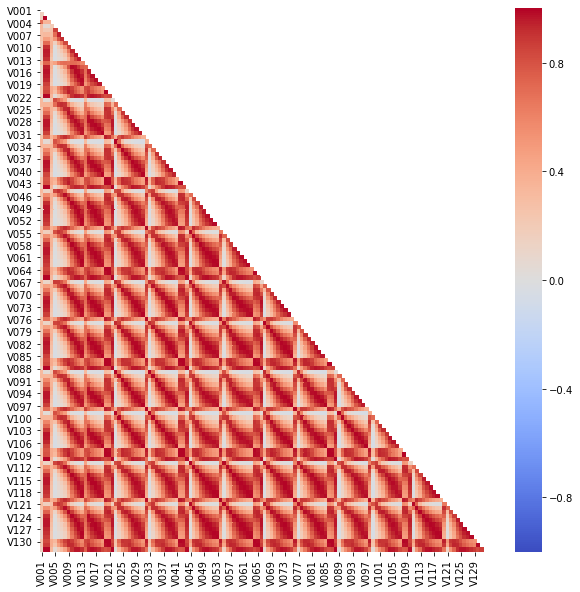

In [9]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

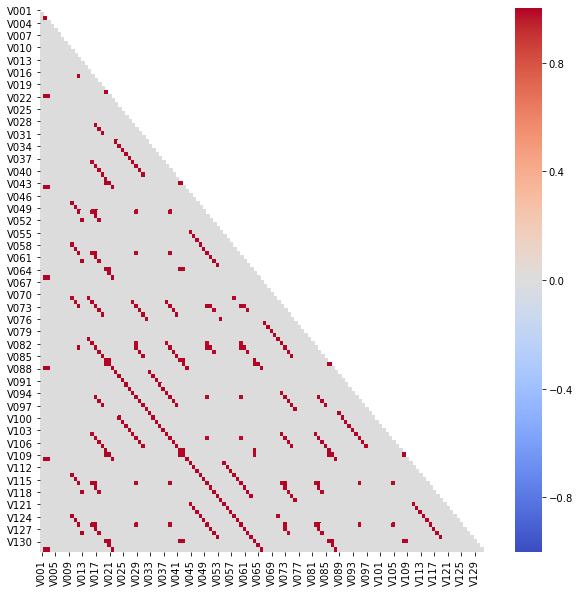

In [10]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

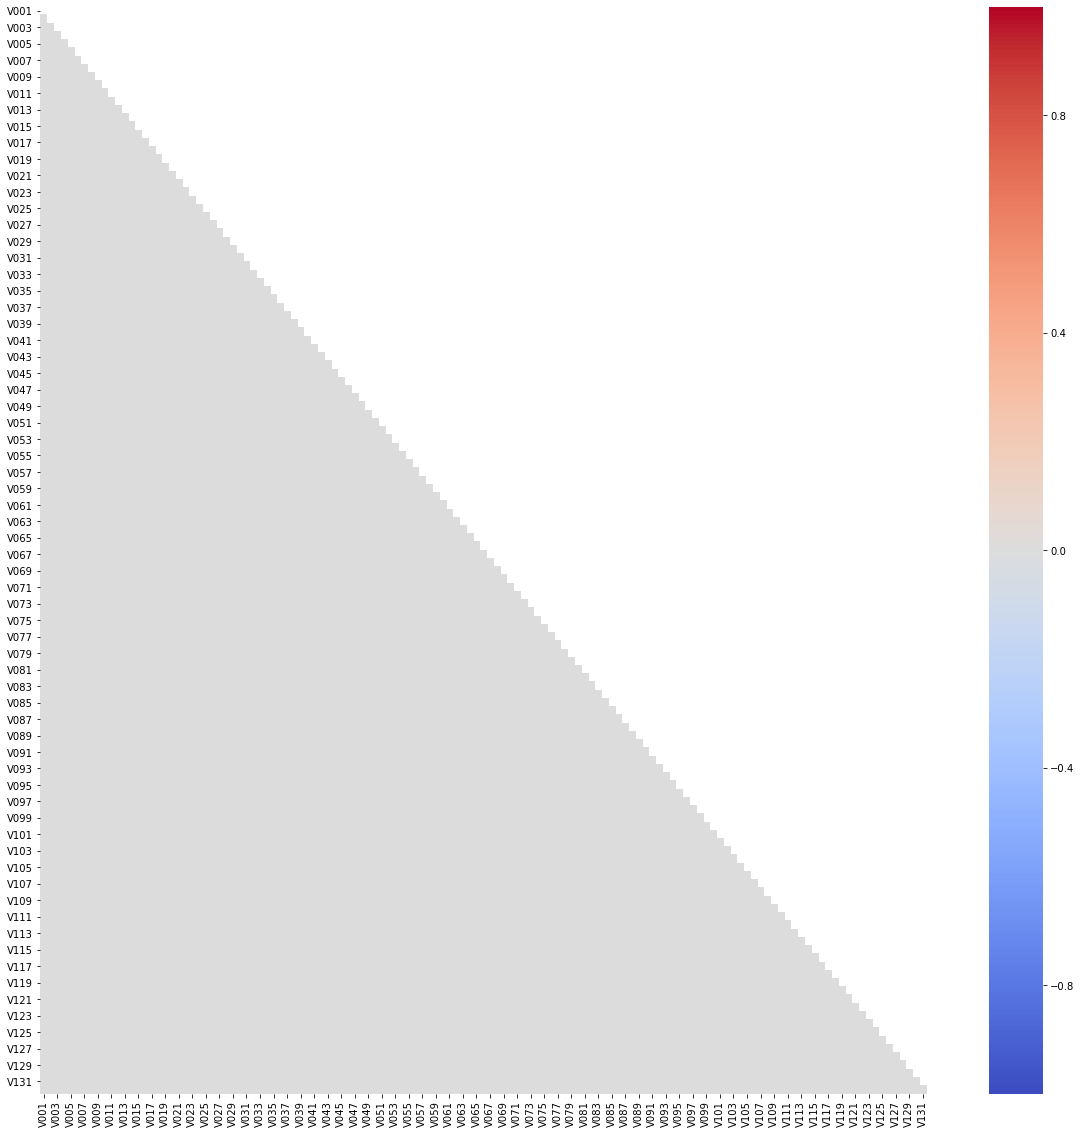

In [8]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);